<a href="https://colab.research.google.com/github/amidyalayashasvini/amidyalayashasvini/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K means cluster

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/content/Dataset.csv")
df.head()

,sno,Name,Age,Income
0,2,Rob,27,70000
1,3,Michael,29,90000
2,4,Mohan,29,61000
3,5,Ismail,28,60000
4,6,Kory,42,150000


Text(0, 0.5, 'Income')

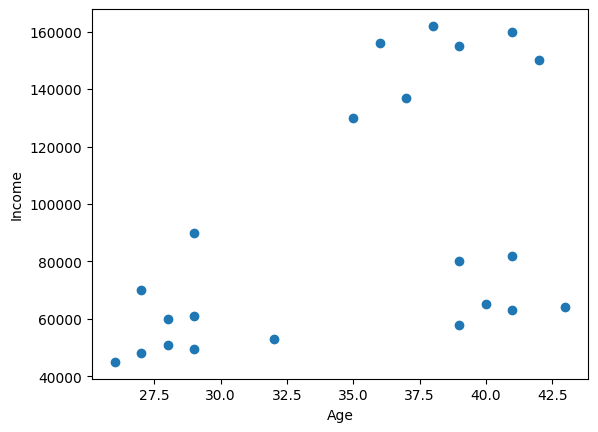

In [4]:
plt.scatter(df.Age,df['Income'])
plt.xlabel('Age')
plt.ylabel('Income')

In [5]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Suppress specific warning by category
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [6]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

Trying to predict the number of clusters in the dataset

In [7]:
df['cluster']=y_predicted
df.head()

,sno,Name,Age,Income,cluster
0,2,Rob,27,70000,2
1,3,Michael,29,90000,2
2,4,Mohan,29,61000,1
3,5,Ismail,28,60000,1
4,6,Kory,42,150000,0


In [8]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

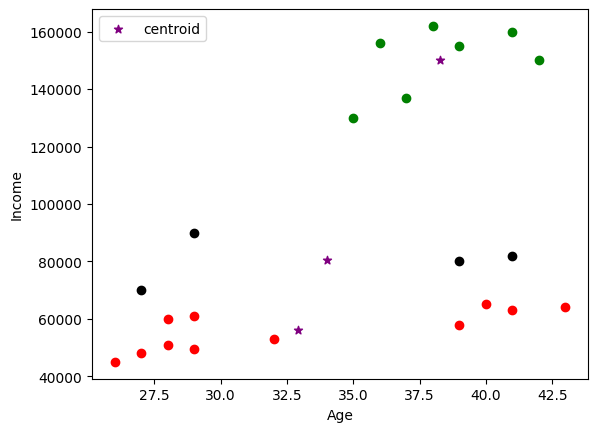

In [9]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income'],color='green')
plt.scatter(df2.Age,df2['Income'],color='red')
plt.scatter(df3.Age,df3['Income'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

Preprocessing using Min Max Scale

In [10]:
scaler = MinMaxScaler()

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [11]:
df.head()

,sno,Name,Age,Income,cluster
0,2,Rob,0.058824,0.213675,2
1,3,Michael,0.176471,0.384615,2
2,4,Mohan,0.176471,0.136752,1
3,5,Ismail,0.117647,0.128205,1
4,6,Kory,0.941176,0.897436,0


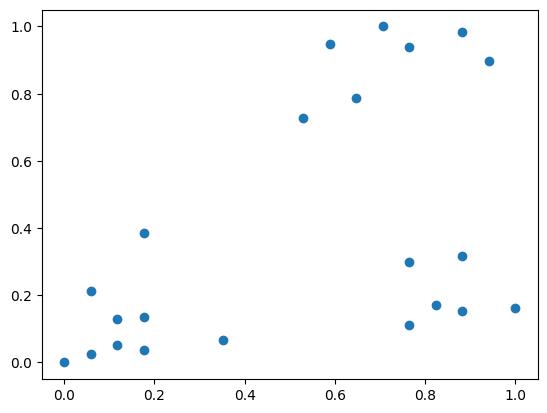

In [12]:
plt.scatter(df.Age,df['Income'])

In [13]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [14]:
df['cluster']=y_predicted
df.head()

,sno,Name,Age,Income,cluster
0,2,Rob,0.058824,0.213675,1
1,3,Michael,0.176471,0.384615,1
2,4,Mohan,0.176471,0.136752,1
3,5,Ismail,0.117647,0.128205,1
4,6,Kory,0.941176,0.897436,0


In [15]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

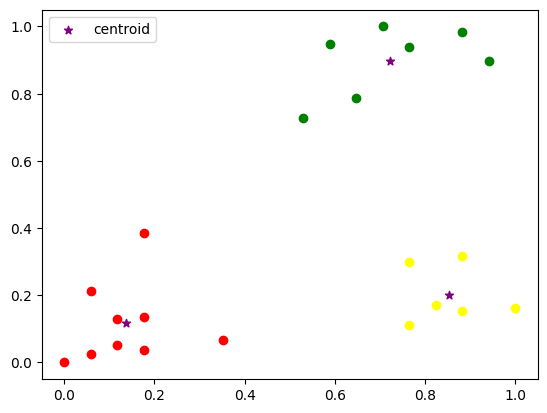

In [16]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income'],color='green')
plt.scatter(df2.Age,df2['Income'],color='red')
plt.scatter(df3.Age,df3['Income'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [17]:
sse = [] #see-->
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income']])
    sse.append(km.inertia_)

The elbow method is used in the K-means clustering algorithm to determine the optimal number of clusters. It works by finding the WCSS (Within-Cluster Sum of Square) for different values of K (number of clusters) and plotting it. The optimal number of clusters is chosen at the point where there is a sharp decrease in the WCSS, creating an "elbow" shape in the plot.

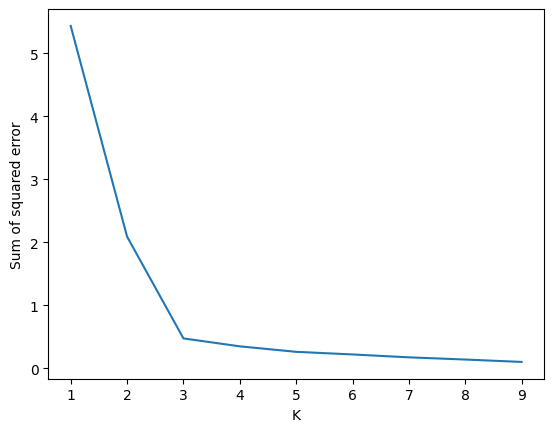

In [18]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)


## DBSCAN(Density-Based Spatial Clustering of Applications with Noise)

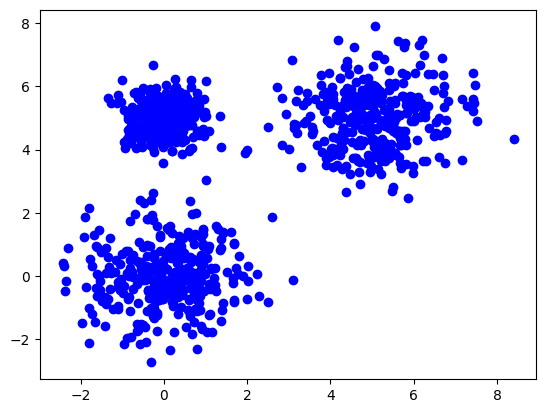

In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# generation of nested dummy data
X, y = make_blobs(n_samples=1000, centers=[[0, 0], [0, 5], [5, 5]], cluster_std=[1.0, 0.5, 1.0])

plt.scatter(X[:,0], X[:,1], color='blue')
plt.show()

In [20]:
from sklearn.cluster import DBSCAN

# model
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# the number of clusters found by DBSCAN
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters found by DBSCAN: {n_clusters}")
# Number of clusters found by DBSCAN: 3

Number of clusters found by DBSCAN: 3


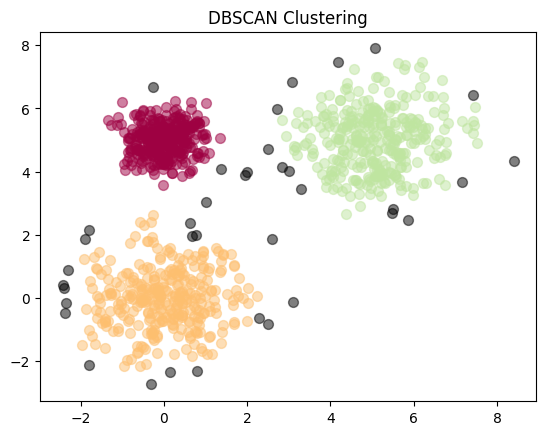

In [21]:
import numpy as np

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black color for noise points (label=-1)
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col], marker='o', alpha=0.5)

plt.title('DBSCAN Clustering')
plt.show()

## Hierarchial cluster

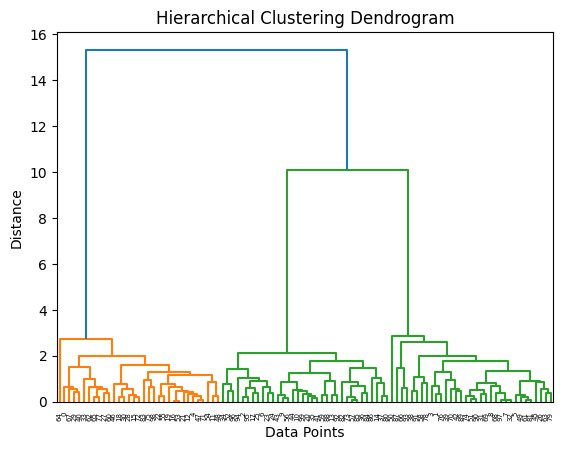

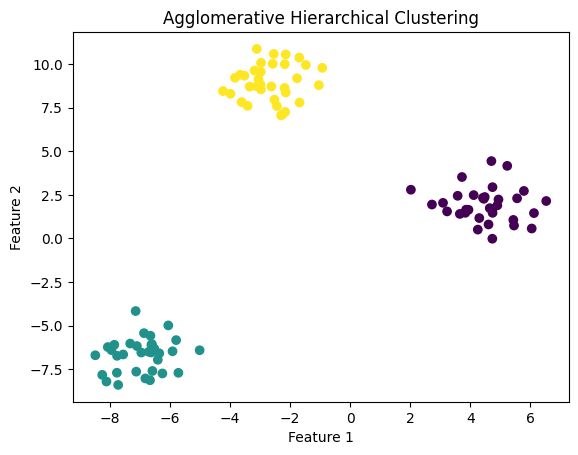

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate synthetic data
data, labels = make_blobs(n_samples=100, centers=3, cluster_std=1.0, random_state=42)

# Agglomerative clustering
model = AgglomerativeClustering(n_clusters=3, linkage='average')
clusters = model.fit_predict(data)

# Dendrogram for hierarchical clustering
linkage_matrix = linkage(data, method='average')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Scatter plot to visualize the clusters
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis')
plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
